In [1]:
import geopandas as gpd

# load in shapefile as geopandas dataframe
# we'll start with a point shapefile
fpath = "/net/projects/cmap/data/GIBI_2021_shapefiles/GIBI_All.shp"
gdf = gpd.read_file(fpath)

In [2]:
import rasterio

# load in raster as rasterio dataset
img_path = "/net/projects/cmap/data/GIBI-images/m_4108701_ne_16_060_20210908.tif"
src = rasterio.open(img_path)

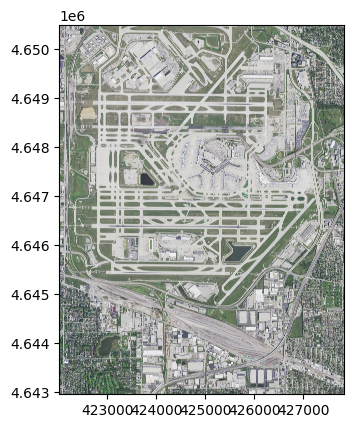

<Axes: >

In [3]:
import rasterio.plot

# show raster with coordinates as axes
rasterio.plot.show(src)

<Axes: >

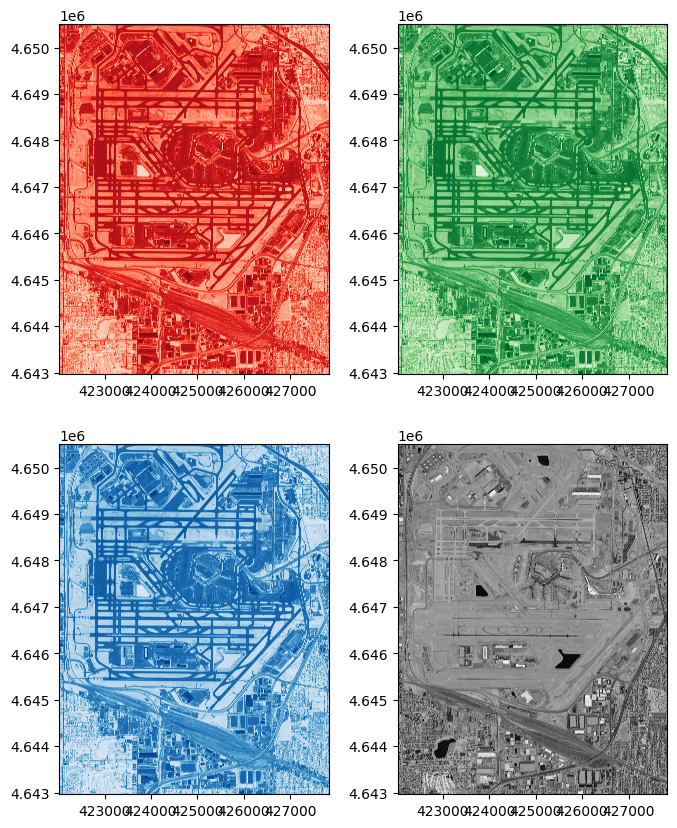

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# the NAIP rasters have 4 bands (R, G, B, NIR) which can be plotted individually
fig, ((axr, axg), (axb, axir)) = plt.subplots(2, 2, figsize=(8, 10))
rasterio.plot.show((src, 1), ax=axr, cmap='Reds') # red band
rasterio.plot.show((src, 2), ax=axg, cmap='Greens') # green band
rasterio.plot.show((src, 3), ax=axb, cmap='Blues') # blue band
rasterio.plot.show((src, 4), ax=axir, cmap='gray') # NIR band

In [5]:
# ensure that the shapefile and raster are in the same coordinate reference system
gdf = gdf.to_crs(src.crs)

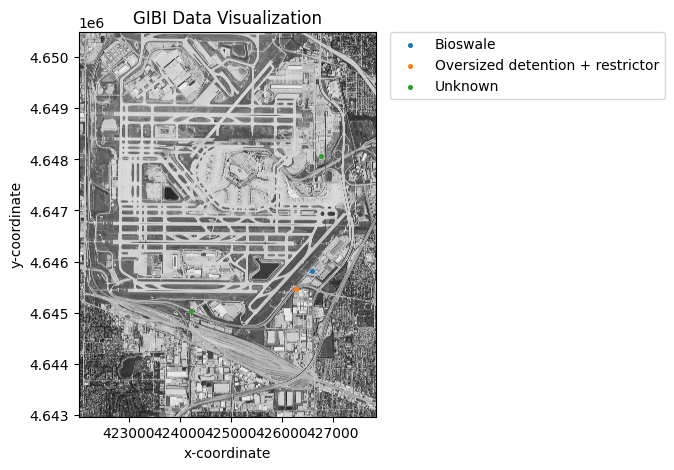

In [6]:
from shapely.geometry import box

# plot the raster
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show((src, 1), ax=ax, cmap="gray")

# get shapefile points that intersect the image
bbox = box(*src.bounds)
intersecting_pts = gdf.drop(gdf[~gdf["geometry"].intersects(bbox)].index)

# for each of the unique labels, plot the points
gi_types = intersecting_pts.groupby("GI_Type")
for gi_type, pts in gi_types:
    pts.plot(ax=ax, markersize=7, label=gi_type)
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("GIBI Data Visualization")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [7]:
# now we'll load in a polygon shapefile
fpath = "/net/projects/cmap/data/kane-county-data/KC_StormwaterDataJan2024.gdb.zip"
gdf2 = gpd.read_file(fpath, layer=4)

In [8]:
# load in a raster corresponding to the polygon shapefile area
img_path = "/net/projects/cmap/data/KC-images/m_4108814_ne_16_060_20210928.tif"
src2 = rasterio.open(img_path)

In [9]:
gdf2 = gdf2.to_crs(src2.crs)

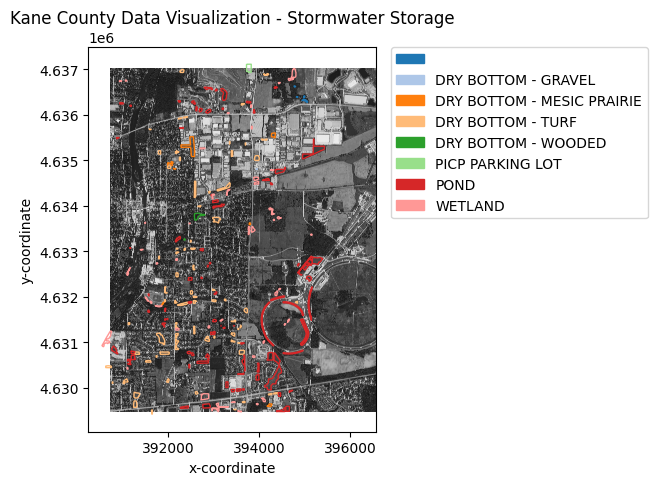

In [10]:
import matplotlib.patches as mpatches

# plot the raster
fig, ax = plt.subplots(figsize=(5, 5))
rasterio.plot.show((src2, 1), ax=ax, cmap="gray")

# get shapefile polygons that intersect the image
bbox = box(*src2.bounds)
intersecting_pts = gdf2.drop(gdf2[~gdf2["geometry"].intersects(bbox)].index)
basin_types = intersecting_pts.groupby("BasinType")

# matplotlib doesn't like plotting polygons with different colors, so we need to map them manually for the legend
color_map = {}
patches = []
colors = plt.colormaps.get_cmap("tab20")
i = 0
for basin_type, _ in basin_types:
    color_map[basin_type] = colors(i)
    patches.append(mpatches.Patch(color=colors(i), label=basin_type))
    i += 1

# for each of the unique labels, plot the polygons
for basin_type, shapes in basin_types:
    shapes.plot(ax=ax, label=basin_type, facecolor="none", edgecolor=color_map[basin_type])
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.title("Kane County Data Visualization - Stormwater Storage")
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()